<a href="https://colab.research.google.com/github/bosla67/Colab/blob/temp/TSAI_Classification_PIPELINE_bestResult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries 📚

In [ ]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} #>> /dev/null
!pip install sktime

In [ ]:
import pandas as pd
import numpy as np
from tsai.all import *
import sklearn.metrics as skm
from sktime.datatypes._panel._convert import from_nested_to_3d_numpy
my_setup()

## Prepare data 🔢

☣️ **Something very important when you prepare your own data is that data needs to be in a 3-d array with the following format:**

1. Samples
2. Variables
3. Length (aka time or sequence steps)

Variables = 1 for univariate datasets and >1 for multivariate.

In the case your data is already separate between train and test like this:

In [ ]:
import pickle
#Get labeled df from file.io
# !wget https://file.io/8QKx5LWTmCJ6 -O df.csv
!wget https://file.io/WZ7CIj7Tq1yP -O df.pkl

!ls -la

# df = pd.read_csv('df.csv')

filename='df'
with open(filename + '.pkl', 'rb') as f:
    df =  pickle.load(f)

df.head()
dsid = 'EURUSD_M5'

--2024-11-30 10:15:34--  https://file.io/A3jOZdKIpxMY
Resolving file.io (file.io)... 143.244.215.221
Connecting to file.io (file.io)|143.244.215.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘df.pkl’

df.pkl                  [            <=>     ] 267.95M  8.93MB/s    in 30s     

2024-11-30 10:16:05 (8.97 MB/s) - ‘df.pkl’ saved [280964117]

total 274400
drwxr-xr-x 1 root root      4096 Nov 30 10:15 .
drwxr-xr-x 1 root root      4096 Nov 30 10:10 ..
drwxr-xr-x 4 root root      4096 Nov 25 19:13 .config
-rw-r--r-- 1 root root 280964117 Nov 30 10:16 df.pkl
drwxr-xr-x 1 root root      4096 Nov 25 19:13 sample_data


In [ ]:
# def create_sequences(data, seq_length):
#     xs = []
#     for i in range(len(data)-seq_length):
#         x = data.iloc[i:(i+seq_length)]
#         # y = data.iloc[i+seq_length]
#         xs.append(x)
#     # return xs
#     # return np.array(xs)
#     return pd.Series(xs)

# def create_result(data, seq_length):
#     ys = []
#     for i in range(len(data)-seq_length):
#         # x = data.iloc[i:(i+seq_length)]
#         y = data.iloc[i+seq_length]
#         ys.append(y)
#     return np.array(ys)
#     # return pd.Series(ys)

In [ ]:
# df.open[0:2]

,open
0,"0 1.05093 1 1.05138 2 1.05078 3 1.05084 4 1.05090 5 1.05102 6 1.05103 7 1.05164 8 1.05161 9 1.05209 10 1.05175 11 1.05205 12 1.05240 13 1.05222 14 1.05249 15 1.05249 16 1.05232 17 1.05209 18 1.05206 19 1.05186 Name: open, dtype: float64"
1,"1 1.05138 2 1.05078 3 1.05084 4 1.05090 5 1.05102 6 1.05103 7 1.05164 8 1.05161 9 1.05209 10 1.05175 11 1.05205 12 1.05240 13 1.05222 14 1.05249 15 1.05249 16 1.05232 17 1.05209 18 1.05206 19 1.05186 20 1.05175 Name: open, dtype: float64"


In [ ]:
print(len(df))
print(df.columns)

20000
Index(['open', 'high', 'low', 'close', 'volume', 'macd', 'boll_lb', 'rsi_5',
       'rsi_10', 'rsi_20', 'rsi_50', 'rsi_100', 'cci_30', 'dx_30',
       'close_5_roc', 'close_10_roc', 'close_20_roc', 'close_50_roc',
       'close_100_roc', 'close_5_ema', 'close_10_ema', 'close_20_ema',
       'close_50_ema', 'close_100_ema', 'close_5_sma', 'close_10_sma',
       'close_20_sma', 'close_50_sma', 'close_100_sma', 'volume_5_sma',
       'volume_10_sma', 'volume_20_sma', 'volume_50_sma', 'volume_100_sma',
       'sma_ratio_5_20', 'sma_ratio_10_50', 'sma_volume_ratio_5_20',
       'sma_volume_ratio_10_50', 'rsi_ratio', 'volatility', 'label_barrier'],
      dtype='object')


In [ ]:
df0=df[100:5100]

In [ ]:
# period=30
# newdf=pd.DataFrame()

# x=create_sequences(df['open'], period)
# newdf['prices_o']=x

# # newdf['prices_o1']=(pd.Series(newdf['prices_o']))
# # newdf['prices_o1']=x #, index=newdf.index)

# x=create_sequences(df['high'], period)
# # newdf['prices_h']=pd.Series([ i for i in x])
# newdf['prices_h']=x

# x=create_sequences(df['low'], period)
# newdf['prices_l']=x

# x=create_sequences(df['close'], period)
# newdf['prices_c']=x

# my=create_result(df['trend'], period)
# # newdf['result']=x

# del x

In [ ]:
my=df0['label_barrier'].values
mX=df0.drop(columns=['label_barrier'])
mX = from_nested_to_3d_numpy(mX)


In [ ]:
print(type(my))
print(type(mX))
mX.shape, my.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


((5000, 40, 20), (5000,))

In [ ]:
# mX[:2]

array([[[1.05278000e+00, 1.05276000e+00, 1.05259000e+00, ...,
         1.05347000e+00, 1.05351000e+00, 1.05253000e+00],
        [1.05290000e+00, 1.05279000e+00, 1.05261000e+00, ...,
         1.05358000e+00, 1.05351000e+00, 1.05322000e+00],
        [1.05274000e+00, 1.05255000e+00, 1.05231000e+00, ...,
         1.05317000e+00, 1.05245000e+00, 1.05252000e+00],
        ...,
        [1.11517165e+00, 1.17047491e+00, 1.26729139e+00, ...,
         2.19925296e+00, 2.22283339e+00, 2.21421879e+00],
        [1.12837543e+00, 7.64698300e-01, 5.16109884e-01, ...,
         1.10166277e+00, 5.61057634e-01, 9.16670761e-01],
        [1.34343448e-04, 1.35399989e-04, 1.38907044e-04, ...,
         1.56397346e-04, 2.08679313e-04, 2.21001842e-04]],

       [[1.05276000e+00, 1.05259000e+00, 1.05234000e+00, ...,
         1.05351000e+00, 1.05253000e+00, 1.05310000e+00],
        [1.05279000e+00, 1.05261000e+00, 1.05260000e+00, ...,
         1.05351000e+00, 1.05322000e+00, 1.05326000e+00],
        [1.05255000e+00, 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mX, my, test_size=0.33, shuffle=False)

In [ ]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# # dsid = 'NATOPS'
# # X, y, splits = get_UCR_data(dsid, return_split=False)

# X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

# tfms  = [None, [Categorize()]]
# dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
# dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)
# model = InceptionTime(dls.vars, dls.c)
# learn = Learner(dls, model, metrics=accuracy)
# learn.fit_one_cycle(25, lr_max=1e-3)
# learn.plot_metrics()

## New scikit-learn-like API 🎉

As of `tsai` version 0.2.15 I have added a new scikit-learn-like API to further simplify the learner creation.

I will prepare a new tutorial to further demonstrate how you can use the new API.

This is how you can use it for Time Series Classification:

In [ ]:
# learn.recorder.values

In [ ]:
# dsid = 'NATOPS'
# X, y, splits = get_UCR_data(dsid, return_split=False)

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])


# tfms = [None, TSForecasting()]
tfms = [None, TSClassification()]
batch_tfms = TSStandardize()

# fulllist = ['ConvTran', 'tAPE', 'AbsolutePositionalEncoding', 'LearnablePositionalEncoding', 'Attention', 'Attention_Rel_Scl',
#          'Attention_Rel_Vec', 'ConvTranBackbone', 'ConvTranPlus', 'FCN', 'FCNPlus', 'GatedTabTransformer', 'HydraMultiRocket', 'HydraMultiRocketBackbonePlus', 'HydraMultiRocketPlus',
#          'Hydra', 'HydraBackbonePlus', 'HydraPlus', 'InceptionModule', 'InceptionBlock', 'InceptionTime', 'InceptionTimePlus17x17', 'InceptionTimePlus32x32', 'InceptionTimePlus47x47',
#          'InceptionTimePlus62x62', 'InceptionTimeXLPlus', 'InceptionModulePlus', 'InceptionBlockPlus', 'InceptionTimePlus', 'InCoordTime', 'XCoordTime', 'MultiInceptionTimePlus',
#          'MiniRocketClassifier', 'load_minirocket', 'MiniRocketRegressor', 'MiniRocketVotingClassifier', 'get_minirocket_preds', 'MiniRocketVotingRegressor', 'MiniRocketFeaturesPlus',
#          'Flatten', 'MiniRocketPlus', 'get_minirocket_features', 'MiniRocketHead', 'InceptionRocketFeaturesPlus', 'InceptionRocketPlus', 'MRF', 'MiniRocketFeatures',
#          'get_minirocket_features', 'MiniRocketHead', 'MiniRocket', 'MLP', 'MultiInputNet', 'MultiRocket', 'Flatten', 'MultiRocketFeaturesPlus', 'MultiRocketBackbonePlus',
#          'MultiRocketPlus', 'SampaddingConv1D_BN', 'build_layer_with_layer_parameter', 'OmniScaleCNN', 'get_Prime_number_in_a_range', 'get_out_channel_number',
#          'generate_layer_parameter_list', 'MovingAverage', 'SeriesDecomposition', 'Flatten_Head', 'PatchTST', 'RNN', 'LSTM', 'GRU', 'RNNAttention', 'LSTMAttention', 'GRUAttention',
#          'RNNAttentionPlus', 'LSTMAttentionPlus', 'GRUAttentionPlus', 'RNNPlus', 'LSTMPlus', 'GRUPlus', 'RNN_FCN', 'LSTM_FCN', 'GRU_FCN', 'MRNN_FCN', 'MLSTM_FCN', 'MGRU_FCN',
#          'RNN_FCNPlus', 'LSTM_FCNPlus', 'GRU_FCNPlus', 'MRNN_FCNPlus', 'MLSTM_FCNPlus', 'MGRU_FCNPlus', 'RocketClassifier', 'load_rocket', 'RocketRegressor', 'get_rocket_features',
#          'ROCKET', 'create_rocket_features', 'ResCNN', 'ResBlock', 'ResNet', 'ResBlockPlus', 'ResNetPlus', 'TemporalBlock', 'TemporalConvNet', 'TCN', 'TSPerceiver',
#          'TSSequencer', 'TSSequencerPlus', 'TST', 'TSTPlus', 'MultiTSTPlus', 'TSiT', 'TSiTPlus', 'ifnone', 'Sequential', 'TabFusionBackbone', 'TabFusionTransformer',
#          'TSTabFusionTransformer', 'TabModel', 'TabBackbone', 'TabHead', 'ifnone', 'SharedEmbedding', 'FullEmbeddingDropout', 'TabTransformer', 'TransformerModel',
#          'TransformerRNNPlus', 'TransformerLSTMPlus', 'TransformerGRUPlus', 'XCM', 'XCMPlus', 'xresnet1d18', 'xresnet1d34', 'xresnet1d50', 'xresnet1d101', 'xresnet1d152',
#          'xresnet1d18_deep', 'xresnet1d34_deep', 'xresnet1d50_deep', 'xresnet1d18_deeper', 'xresnet1d34_deeper', 'xresnet1d50_deeper', 'XResNet1dPlus', 'xresnet1d18plus',
#          'xresnet1d34plus', 'xresnet1d50plus', 'xresnet1d101plus', 'xresnet1d152plus', 'xresnet1d18_deepplus', 'xresnet1d34_deepplus', 'xresnet1d50_deepplus', 'xresnet1d18_deeperplus',
#          'xresnet1d34_deeperplus', 'xresnet1d50_deeperplus', 'XceptionModule', 'XceptionBlock', 'XceptionTime', 'XceptionModulePlus', 'XceptionBlockPlus', 'XceptionTimePlus']

maked = ['ConvTran', 'ConvTranPlus', 'FCN', 'FCNPlus', 'HydraMultiRocket', 'HydraMultiRocketPlus',
         'Hydra', 'HydraPlus', 'InceptionTime', 'InceptionTimePlus17x17', 'InceptionTimePlus32x32', 'InceptionTimePlus47x47',
         'InceptionTimePlus62x62', 'InceptionTimeXLPlus', 'InceptionTimePlus', 'InCoordTime', 'XCoordTime', 'MultiInceptionTimePlus',
         'MiniRocketPlus', 'InceptionRocketPlus', 'MiniRocket', 'MLP', 'MultiRocket', 'MultiRocketPlus', 'OmniScaleCNN', 'RNN', 'LSTM',
         'GRU', 'RNNAttention', 'LSTMAttention', 'GRUAttention', 'RNNAttentionPlus', 'LSTMAttentionPlus', 'GRUAttentionPlus', 'RNNPlus',
    'LSTMPlus', 'GRUPlus', 'RNN_FCN', 'LSTM_FCN', 'GRU_FCN', 'MRNN_FCN', 'MLSTM_FCN', 'MGRU_FCN', 'RNN_FCNPlus', 'LSTM_FCNPlus',
         'GRU_FCNPlus', 'MRNN_FCNPlus', 'MLSTM_FCNPlus', 'MGRU_FCNPlus', 'ResCNN', 'ResNet', 'ResNetPlus', 'TCN', 'TSSequencer',
         'TSSequencerPlus', 'TST', 'TSTPlus', 'MultiTSTPlus', 'TSiT', 'TSiTPlus', 'TransformerModel', 'XCM', 'XCMPlus', 'XResNet1dPlus',
         'xresnet1d18plus', 'xresnet1d34plus', 'xresnet1d50plus', 'xresnet1d101plus', 'xresnet1d152plus', 'xresnet1d18_deepplus',
         'xresnet1d34_deepplus', 'xresnet1d50_deepplus', 'xresnet1d18_deeperplus', 'xresnet1d34_deeperplus', 'xresnet1d50_deeperplus',
         'XceptionTime', 'XceptionTimePlus']

wrang = ['tAPE', 'AbsolutePositionalEncoding', 'LearnablePositionalEncoding', 'Attention', 'Attention_Rel_Scl', 'Attention_Rel_Vec', 'ConvTranBackbone', 'GatedTabTransformer',
         'HydraMultiRocketBackbonePlus', 'HydraBackbonePlus', 'InceptionModule', 'InceptionBlock', 'InceptionBlockPlus', 'MiniRocketClassifier', 'load_minirocket',
         'MiniRocketRegressor', 'MiniRocketVotingClassifier', 'get_minirocket_preds', 'MiniRocketVotingRegressor', 'MiniRocketFeaturesPlus', 'Flatten', 'get_minirocket_features',
         'MiniRocketHead', 'InceptionRocketFeaturesPlus', 'MRF', 'MiniRocketFeatures', 'get_minirocket_features', 'MiniRocketHead', 'MultiInputNet', 'Flatten',
         'MultiRocketFeaturesPlus', 'MultiRocketBackbonePlus', 'SampaddingConv1D_BN', 'build_layer_with_layer_parameter', 'get_Prime_number_in_a_range',
         'get_out_channel_number', 'generate_layer_parameter_list', 'MovingAverage', 'SeriesDecomposition', 'Flatten_Head', 'PatchTST', 'RocketClassifier', 'load_rocket',
         'RocketRegressor', 'get_rocket_features', 'ROCKET', 'create_rocket_features', 'ResBlock', 'ResBlockPlus', 'TemporalBlock', 'TemporalConvNet', 'TSPerceiver',
         'ifnone', 'Sequential', 'TabFusionBackbone', 'TabFusionTransformer', 'TSTabFusionTransformer', 'TabModel', 'TabBackbone', 'TabHead', 'ifnone', 'SharedEmbedding',
         'FullEmbeddingDropout', 'TabTransformer', 'TransformerRNNPlus', 'TransformerLSTMPlus', 'TransformerGRUPlus', 'xresnet1d18', 'xresnet1d34', 'xresnet1d50',
         'xresnet1d101', 'xresnet1d152', 'xresnet1d18_deep', 'xresnet1d34_deep', 'xresnet1d50_deep', 'xresnet1d18_deeper', 'xresnet1d34_deeper', 'xresnet1d50_deeper',
         'XceptionModule', 'XceptionBlock', 'XceptionModulePlus', 'XceptionBlockPlus']

best10 =  ['MLP', 'TCN', 'XceptionTime', 'GRUPlus', 'XceptionTimePlus',
           'GRU', 'TransformerModel', 'LSTM', 'LSTMPlus', 'XCM']

archs = maked
# archs = best10


results = pd.DataFrame(columns=['arch', 'train loss', 'valid loss', 'accuracy', 'time'])

# # No Graphics
# for i, arch in enumerate(archs):
#   start = time.time()
#   learn = TSClassifier(X, y, splits=splits, bs=[64, 128], batch_tfms=batch_tfms, arch=arch, metrics=accuracy_multi)
#   # learn.fit_one_cycle(25, lr_max=1e-3)
#   learn.fit_one_cycle(25, lr_max=1e-3)
#   # fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch=arch, metrics=mae, cbs=ShowGraph())
#   # fcst.fit_one_cycle(50, 1e-3)
#   # fcst.fit_one_cycle(2, 1e-3)
#   elapsed = time.time() - start
#   # vals = learn.recorder.values[-1]
#   vals = learn.recorder.values[-1]
#   results.loc[i] = [arch, vals[0], vals[1], vals[2], int(elapsed)]
#   results.sort_values(by='accuracy_multi', ascending=False, kind='stable', ignore_index=True, inplace=True)
#   clear_output()
#   display(results)
#   file_name = arch+"_learn.pkl"
#   learn.export(file_name)

# Graphics
for i, arch in enumerate(archs):
  print('=================================================')
  print(arch)
  print('=================================================')
  start = time.time()
  clf = TSClassifier(X, y, splits=splits, path='models', arch=arch, tfms=tfms, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
  # clf = TSClassifier(X, y, splits=splits, bs=[64, 128], batch_tfms=batch_tfms, arch=arch, metrics=accuracy_multi)
  # learn.fit_one_cycle(25, lr_max=1e-3)
  clf.fit_one_cycle(35, lr_max=1e-3)
  # fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch=arch, metrics=mae, cbs=ShowGraph())
  # fcst.fit_one_cycle(50, 1e-3)
  # fcst.fit_one_cycle(2, 1e-3)
  elapsed = time.time() - start

  # vals = learn.recorder.values[-1]
  vals = clf.recorder.values[-1]
  results.loc[i] = [arch, vals[0], vals[1], vals[2], int(elapsed)]
  results.sort_values(by='accuracy', ascending=False, kind='stable', ignore_index=True, inplace=True)

  clf.plot_metrics()
  clf.show_probas()
  clf.plot_confusion_matrix()
  clf.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)
  clf.top_losses(X[splits[1]], y[splits[1]], largest=True)

  # learn.feature_importance()
  # learn.step_importance(n_steps=5)

  # clear_output()
  # display(results)
  file_name = arch+"_clf.pkl"
  clf.export(file_name)
  print('=================================================')

display(results)


# learn = TSClassifier(X, y, splits=splits, bs=[64, 128], batch_tfms=[TSStandardize()], arch=InceptionTime, metrics=accuracy)
# # learn.fit_one_cycle(25, lr_max=1e-3)
# learn.fit_one_cycle(1, lr_max=1e-3)
# learn.plot_metrics()

In [ ]:
for i in range(len(results)):
  print(results.iloc[i])
results.to_parquet('./models/results.parquet')

In [ ]:
%cd ./models/
!ls -la
!zip models_pkl.zip *.*
!ls -la


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# clf.plot_metrics()
# clf.show_probas()
# clf.plot_confusion_matrix()
# clf.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)
# clf.top_losses(X[splits[1]], y[splits[1]], largest=True)

In [ ]:
# clf.plot_confusion_matrix()
# # clf.plot_metrics()
# clf.show_probas()
# clf.plot_top_losses(X[splits[1]], y[splits[1]], largest=True)
# clf.top_losses(X[splits[1]], y[splits[1]], largest=True)

X.shape: (3350, 40, 20)
y.shape: (3350,)
Selected metric: accuracy
Computing feature importance (permutation method)...


  0 feature: BASELINE             accuracy: 0.690448


  0 feature: var_0                accuracy: 0.690448


  1 feature: var_1                accuracy: 0.690448


  2 feature: var_2                accuracy: 0.690448


  3 feature: var_3                accuracy: 0.690448


  4 feature: var_4                accuracy: 0.530448


  5 feature: var_5                accuracy: 0.690448


  6 feature: var_6                accuracy: 0.690448


  7 feature: var_7                accuracy: 0.504478


  8 feature: var_8                accuracy: 0.574627


  9 feature: var_9                accuracy: 0.628657


 10 feature: var_10               accuracy: 0.656716


 11 feature: var_11               accuracy: 0.646866


 12 feature: var_12               accuracy: 0.433731


 13 feature: var_13               accuracy: 0.654925


 14 feature: var_14               accuracy: 0.690746


 15 feature: var_15               accuracy: 0.690746


 16 feature: var_16               accuracy: 0.690746


 17 feature: var_17               accuracy: 0.690746


 18 feature: var_18               accuracy: 0.690746


 19 feature: var_19               accuracy: 0.690448


 20 feature: var_20               accuracy: 0.690448


 21 feature: var_21               accuracy: 0.690448


 22 feature: var_22               accuracy: 0.690448


 23 feature: var_23               accuracy: 0.690448


 24 feature: var_24               accuracy: 0.690448


 25 feature: var_25               accuracy: 0.690448


 26 feature: var_26               accuracy: 0.690448


 27 feature: var_27               accuracy: 0.690448


 28 feature: var_28               accuracy: 0.690448


 29 feature: var_29               accuracy: 0.525373


 30 feature: var_30               accuracy: 0.512836


 31 feature: var_31               accuracy: 0.421194


 32 feature: var_32               accuracy: 0.455821


 33 feature: var_33               accuracy: 0.499701


 34 feature: var_34               accuracy: 0.690448


 35 feature: var_35               accuracy: 0.690448


 36 feature: var_36               accuracy: 0.690746


 37 feature: var_37               accuracy: 0.691045


 38 feature: var_38               accuracy: 0.691045


 39 feature: var_39               accuracy: 0.690448



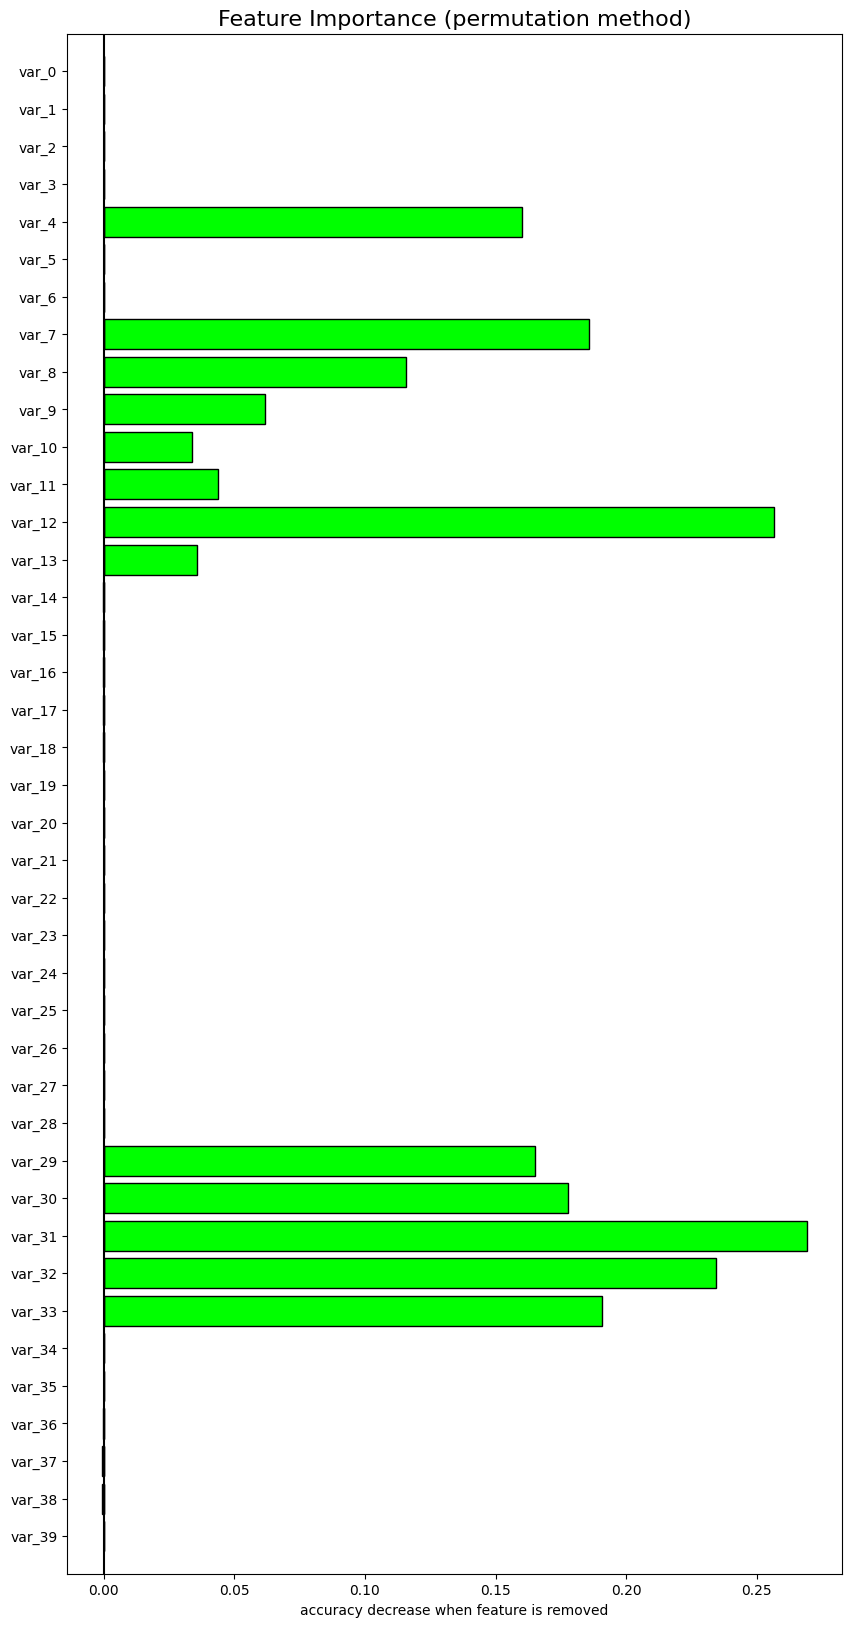

,Feature,accuracy,accuracy_change
0,var_31,0.421194,0.269254
1,var_12,0.433731,0.256716
2,var_32,0.455821,0.234627
3,var_33,0.499701,0.190746
4,var_7,0.504478,0.185970
5,var_30,0.512836,0.177612
6,var_29,0.525373,0.165075
7,var_4,0.530448,0.160000
8,var_8,0.574627,0.115821
9,var_9,0.628657,0.061791


In [ ]:
#  https://timeseriesai.github.io/tsai/analysis.html#learner.feature_importance
# clf.feature_importance()